  ## CUSTOMER CHURN ANALYSIS - TELECOM DATASET ##

OVERVIEW OF CHURN AND WHY IT MATTERS

Customer churn refers to the rate at which customers stop using a company’s products or services. In industries like telecom, where competition is high and acquisition costs are steep, retaining existing customers is often more cost-effective than acquiring new ones. Understanding churn patterns helps businesses:

💰 Reduce revenue loss from departing customers

🎯 Target at-risk customers with retention strategies

📈 Improve service offerings and customer satisfaction

🧠 Make data-driven decisions for long-term growth

🎯 Objective of the Analysis

This analysis aims to:

-- Identify factors that influence customer churn within the telecom dataset

-- Discover key behavioral and demographic trends behind churn

-- Build predictive models to forecast churn risk

-- Segment customers into meaningful groups for targeted strategies

-- Provide actionable recommendations to minimize future churn

## 📊 Dataset Summary

| Attribute              | Description                                      |
|-----------------------|--------------------------------------------------|
| *Total Records*      | 7,043 customers                                  |
| *Number of Features* | 21 columns                                       |
| *Feature Types*      | Mostly categorical (object), some numeric (int64, float64) |
| *Missing Values*     | None after cleaning (TotalCharges blanks filled) |
| *Duplicates*         | 0 duplicate entries                              |
| *Target Column*      | Churn (Yes/No)                                 |

---

## 💡 Key Feature Highlights

- SeniorCitizen: Encoded as "Yes"/"No"
- TotalCharges: Converted to numeric format
- Tenure: Customer tenure from 0 to 72 months
- Categorical service columns like Contract, PaymentMethod, InternetService
- Add-on services (TechSupport, StreamingTV, etc.) influence churn behavior

---

## 📈 Churn Distribution

- *Churned Customers*: 1,869  
- *Non-Churned Customers*: 5,174  
- *Churn Rate*: ~26.5% of total customers

## DATA PREPROCESSING

In [72]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scipy
!pip install scikit-learn
!pip install xgboost

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
os.chdir(r"C:\Users\Anupriya Bharti\Desktop\data projects\Churn Analysis")

df=pd.read_csv("Customer Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [110]:
df.rename(columns = {"customerID" : "CustomerID","gender":"Gender","tenure":"Tenure"}, inplace=True)

REPLACE BLANK WITH 0

Replacing Blank with 0 as tenure is 0 and no total charges are recorded

In [111]:
df["TotalCharges"]=df["TotalCharges"].replace(" ","0")
df["TotalCharges"]=df["TotalCharges"].astype("float")

In [112]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"

df["SeniorCitizen"]=df["SeniorCitizen"].apply(conv)

CONVERTING NUMERIC VALAUES TO CATEGORICAL VALUES

Converted 0 and 1 values of senior citizen to yes/no to make it easier to understand

In [78]:
df.isnull().sum()

CustomerID          0
Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#Replacing the coulmn name

In [79]:
df.duplicated().sum()

np.int64(0)

In [80]:
df["CustomerID"].duplicated().sum()

np.int64(0)

In [81]:
df.describe()

,Tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [138]:
df

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup,TotalServices,AverageMonthlyCharges,Has_OnlineSecurity,Has_MultipleLines,ChurnFlag
0,7590-VHVEG,Female,no,Yes,No,1,No,No,DSL,No,...,Electronic check,29.85,29.85,No,0–12 months,1,29.850000,0,0,0
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Mailed check,56.95,1889.50,No,25–36 months,3,55.573529,1,0,0
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,Mailed check,53.85,108.15,Yes,0–12 months,3,54.075000,1,0,1
3,7795-CFOCW,Male,no,No,No,45,No,No,DSL,Yes,...,Bank transfer (automatic),42.30,1840.75,No,37–48 months,3,40.905556,1,0,0
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,Electronic check,70.70,151.65,Yes,0–12 months,1,75.825000,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,no,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Mailed check,84.80,1990.50,No,13–24 months,7,82.937500,1,1,0
7039,2234-XADUH,Female,no,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Credit card (automatic),103.20,7362.90,No,60+ months,6,102.262500,0,1,0
7040,4801-JZAZL,Female,no,Yes,Yes,11,No,No,DSL,Yes,...,Electronic check,29.60,346.45,No,0–12 months,1,31.495455,1,0,0
7041,8361-LTMKD,Male,yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,Mailed check,74.40,306.60,Yes,0–12 months,2,76.650000,0,1,1


## EXPLORATORY DATA ANALYSIS

NO.OF CHURN AND NON-CHURN CUSTOMERS

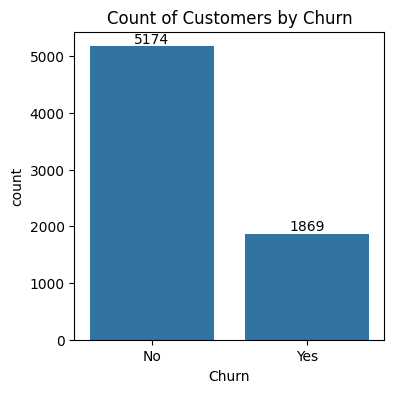

In [121]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x='Churn', data=df)

ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn")
#plt.figure(figsize=(1,1))
plt.show()

PERCENTAGE OF CHURN CUSTOMERS

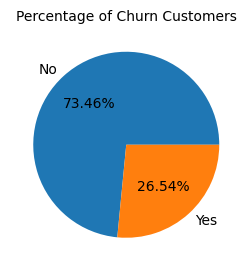

In [122]:
plt.figure(figsize=(3,4))
gb=df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb["Churn"],labels=gb.index,autopct="%1.2f%%")
plt.title("Percentage of Churn Customers", fontsize= 10)
plt.show()

#From the given pie chart 26.54% of our customers have churned out.

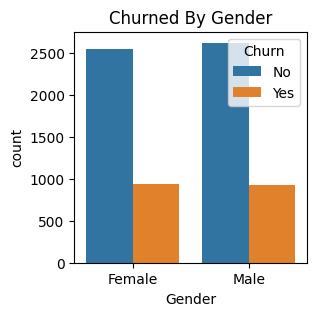

In [123]:
plt.figure(figsize=(3,3))
sns.countplot(x="Gender" , data = df, hue="Churn")
plt.title("Churned By Gender")
plt.show()

CHURN BY GENDER IN PERCENTAGES

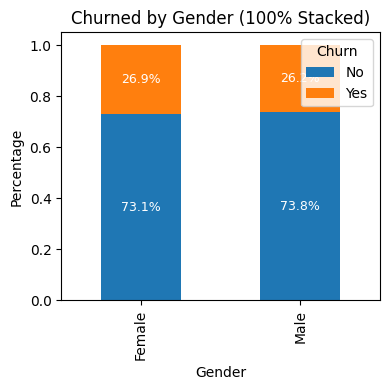

In [124]:

# Step 1: Calculate counts
counts = pd.crosstab(df['Gender'], df['Churn'])

# Step 2: Convert to percentages (row-wise)
percentages = counts.div(counts.sum(axis=1), axis=0)

# Step 3: Plot stacked bar chart
ax = percentages.plot(kind='bar', stacked=True, figsize=(4, 4), color=['#1f77b4', '#ff7f0e'])

# Step 4: Annotate each segment with its percentage
for bar in ax.patches:
    height = bar.get_height()
    if height > 0:
        ax.annotate(f'{height * 100:.1f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),
                    ha='center', va='center',
                    color='white', fontsize=9)

# Step 5: Final styling
plt.title('Churned by Gender (100% Stacked)')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.legend(title='Churn', loc='upper right')
plt.tight_layout()
plt.show()

COUNT OF CHURN BY SENIOR CITIZEN

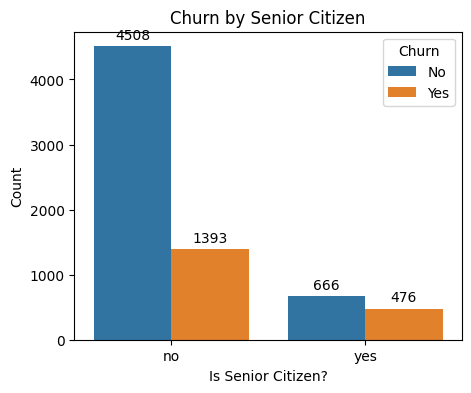

In [125]:

plt.figure(figsize=(5,4))
ax = sns.countplot(x='SeniorCitizen', hue='Churn', data=df)

# Loop over all BarContainers (one per hue level)
for container in ax.containers:
    ax.bar_label(container, padding=3)

plt.title('Churn by Senior Citizen')
plt.xlabel('Is Senior Citizen?')
plt.ylabel('Count')
plt.show()

CHURN BY SENIOR CITIZEN IN PERCENTAGES

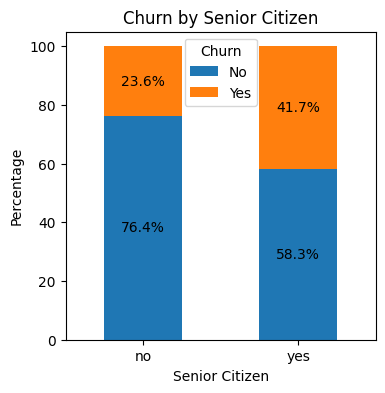

In [126]:
total_counts= df.groupby('SeniorCitizen')["Churn"].value_counts(normalize= True).unstack() * 100

#plot
fig, ax = plt.subplots(figsize=(4,4))

#plot the bars
total_counts.plot(kind = "bar", stacked = True, ax=ax)

#Adding percencatge labels on the bars
for p in ax.patches:
    width,height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height/2, f'{height:.1f}%', ha= 'center', va='center')

plt.title("Churn by Senior Citizen")
plt.xlabel("Senior Citizen")
plt.ylabel('Percentage')
plt.xticks(rotation = 0)
plt.legend(title="Churn", loc='upper center')
plt.show()

#Nearly 41.7% of people in senior citizen category has churned out,

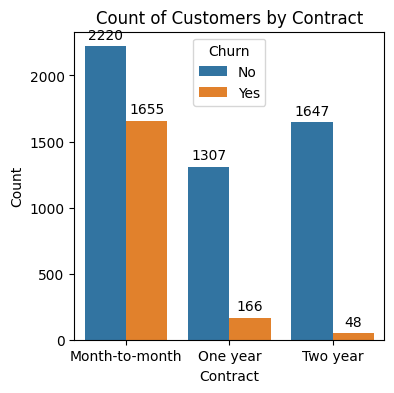

In [127]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x='Contract', hue='Churn', data=df)

# Loop over all BarContainers (one per hue level)
for container in ax.containers:
    ax.bar_label(container, padding=3)

plt.title('Count of Customers by Contract')
plt.xlabel('Contract')
plt.ylabel('Count')
plt.show()

#People with mmonth -to -month contract are likely to churn than those who have 1 or 2 years of contract

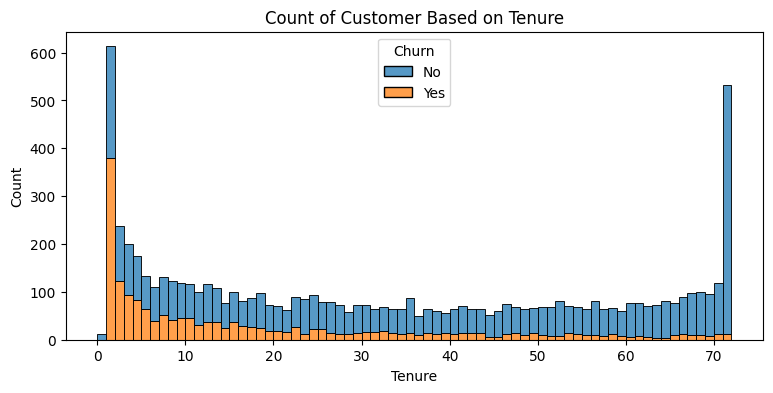

In [128]:
plt.figure(figsize=(9,4))
sns.histplot(x='Tenure', hue='Churn', data=df, bins=72, multiple= 'stack')
plt.title('Count of Customer Based on Tenure')
plt.show()

People who have  used our services for long time have stayed and people who has used our services for 1 or 2 months have churned

In [91]:
df.columns.values

array(['CustomerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'Tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

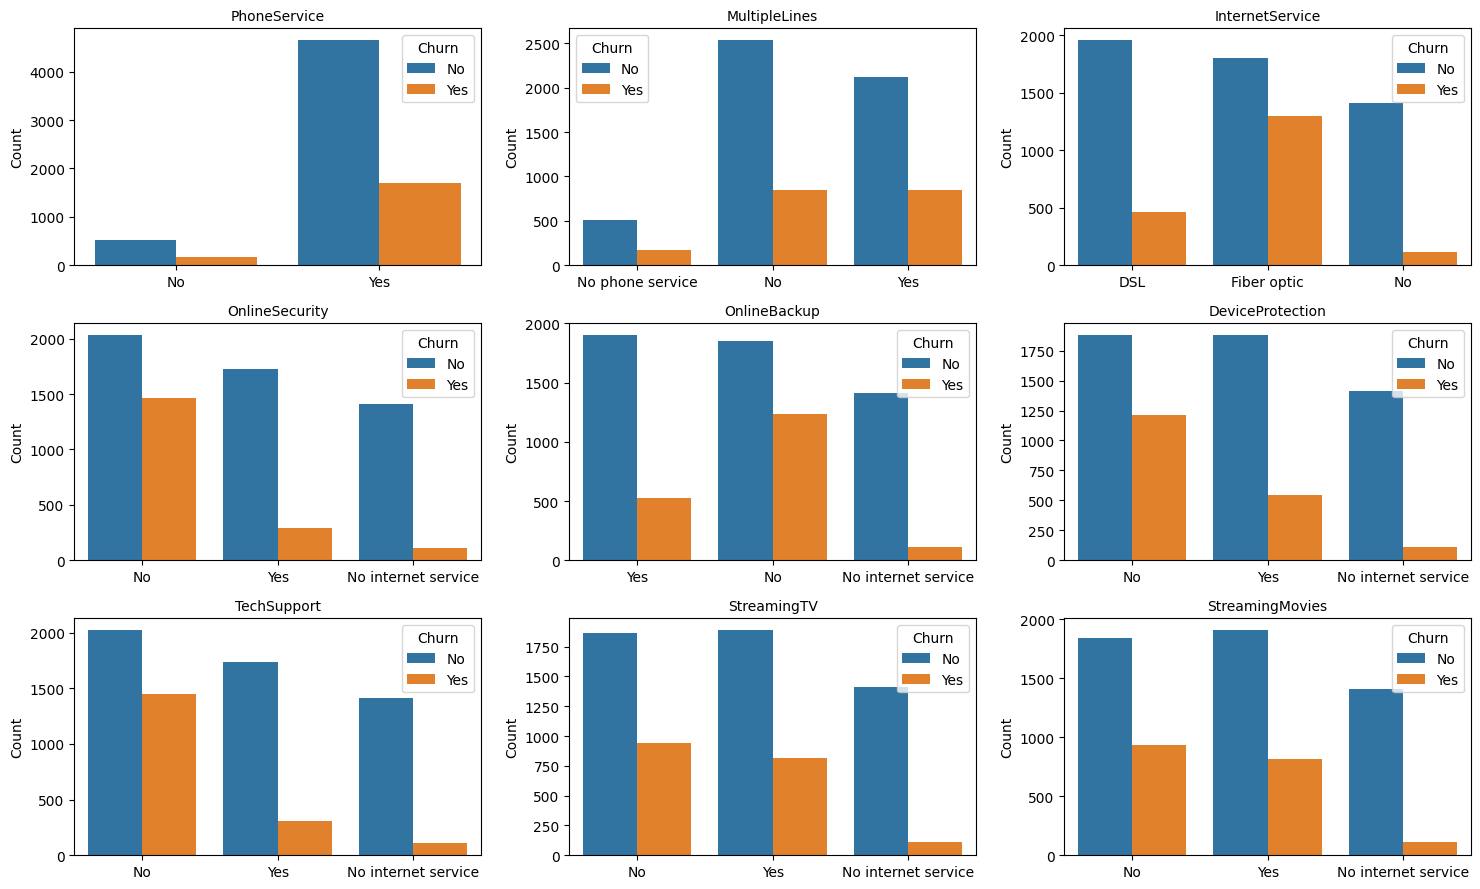

In [129]:
# Selected columns
cols = ['PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies']

# Determine subplot grid size
n_cols = 3
n_rows = (len(cols) + n_cols - 1) // n_cols  # auto-calculates rows

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 3))
axes = axes.flatten()

# Loop through columns and plot
for i, col in enumerate(cols):
    ax = axes[i]
    sns.countplot(data=df, x=col, ax=ax, hue= 'Churn')
    ax.set_title(f'{col}', fontsize=10)
    ax.set_xlabel('')
    ax.set_ylabel('Count')
   

# Remove any unused subplot boxes
for j in range(len(cols), len(axes)):
     fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

 #Customers without additional services (OnlineSecurity, Backup, DeviceProtection, TechSupport) churn at higher rates.
 #Fiber optic internet users churn more than DSL users.
 #Engagement services like StreamingTV and StreamingMovies correlate with reduced churn.
 #Basic services like PhoneService and MultipleLines have mixed signals, but add‑ons clearly help retention.

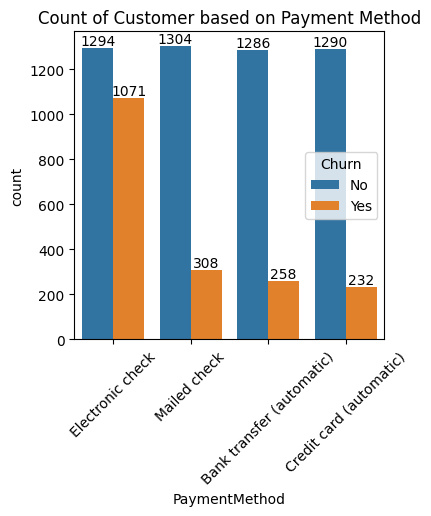

In [130]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x='PaymentMethod', hue='Churn', data=df)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Count of Customer based on Payment Method')
plt.xticks(rotation = 45)
plt.show()

#Customer is likely to churn when they are using Electronic Check

## FEATURE ENGINEERING

In [132]:
# 1. Convert TotalCharges to numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')

# 2. Tenure Groups
bins = [0, 12, 24, 36, 48, 60, float('inf')]
labels = ['0–12 months', '13–24 months', '25–36 months', '37–48 months', '49–60 months', '60+ months']
df['TenureGroup'] = pd.cut(df['Tenure'], bins=bins, labels=labels, right=True)

# 3. Total Services Count
service_cols = [
    'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Replace 'No internet service' and 'No phone service' with 'No'
df[service_cols] = df[service_cols].replace({'No internet service': 'No', 'No phone service': 'No'})

# Count number of "Yes" services
df['TotalServices'] = df[service_cols].apply(lambda row: sum(row == 'Yes'), axis=1)

# 4. Average Monthly Charges (handling divide-by-zero)
df['AverageMonthlyCharges'] = df.apply(
    lambda row: row['TotalCharges'] / row['Tenure'] if row['Tenure'] != 0 else 0,
    axis=1
)

# 5. Binary Flags (Yes = 1, else 0)
binary_flags = ['OnlineSecurity', 'MultipleLines']
for col in binary_flags:
    df[f'Has_{col}'] = df[col].apply(lambda x: 1 if x == 'Yes' else 0)

# Optional: view updated columns
print(df[['Tenure', 'TenureGroup', 'TotalServices', 'AverageMonthlyCharges', 'Has_OnlineSecurity', 'Has_MultipleLines']].head(10))

   Tenure   TenureGroup  TotalServices  AverageMonthlyCharges  \
0       1   0–12 months              1              29.850000   
1      34  25–36 months              3              55.573529   
2       2   0–12 months              3              54.075000   
3      45  37–48 months              3              40.905556   
4       2   0–12 months              1              75.825000   
5       8   0–12 months              5             102.562500   
6      22  13–24 months              4              88.609091   
7      10   0–12 months              1              30.190000   
8      28  25–36 months              6             108.787500   
9      62    60+ months              3              56.257258   

   Has_OnlineSecurity  Has_MultipleLines  
0                   0                  0  
1                   1                  0  
2                   1                  0  
3                   1                  0  
4                   0                  0  
5                   0     

In [134]:
df["ChurnFlag"] = df["Churn"].map({"Yes": 1, "No": 0})

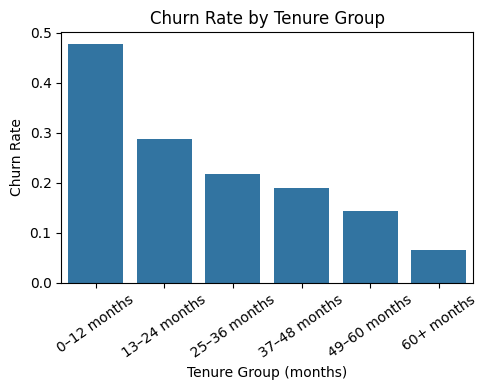

In [96]:
# Bar plot: churn rate by tenure group
plt.figure(figsize=(5,4))
sns.barplot(data=df, x="TenureGroup", y="ChurnFlag", errorbar=None)
plt.title("Churn Rate by Tenure Group")
plt.ylabel("Churn Rate")
plt.xlabel("Tenure Group (months)")
plt.xticks(rotation =35)
plt.tight_layout()
plt.show()

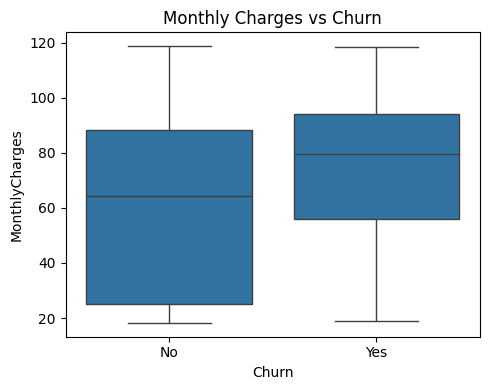

In [97]:
plt.figure(figsize=(5, 4))
sns.boxplot(data=df, x="Churn", y="MonthlyCharges")
plt.title("Monthly Charges vs Churn")
plt.tight_layout()
plt.show()

High-paying customers are more likely to churn,

Moderate-paying customers are more stable

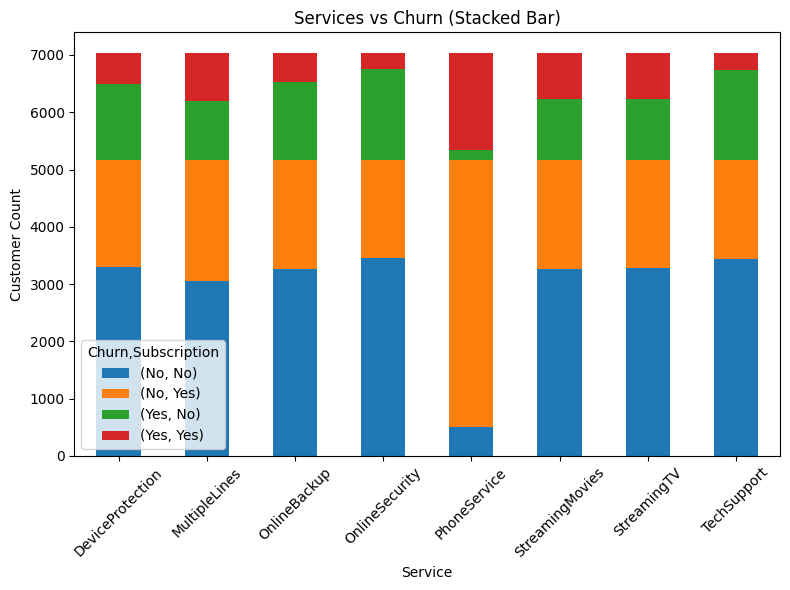

In [98]:
# Melt for grouped plotting
df_melted = df.melt(id_vars="Churn", value_vars=service_cols, var_name="Service", value_name="Subscription")

# Group and count
grouped = df_melted.groupby(["Service", "Subscription", "Churn"]).size().unstack(fill_value=0)

# Plot stacked bar
grouped.unstack(level=-1).plot(kind="bar", stacked=True, figsize=(8, 6))
plt.title("Services vs Churn (Stacked Bar)")
plt.ylabel("Customer Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Customers who do not subscribe to services like OnlineSecurity and TechSupport show noticeably higher churn rates, suggesting these services may help retain users. Services like StreamingTV and MultipleLines have more balanced churn patterns, indicating they may be less influential in customer retention.

##   CHI-SQUARE TEST

In [99]:
from scipy.stats import chi2_contingency
import pandas as pd

# Example: OnlineSecurity vs Churn
contingency = pd.crosstab(df['OnlineSecurity'], df['Churn'])
chi2, p, dof, expected = chi2_contingency(contingency)

print("Chi-square Statistic:", chi2)
print("p-value:", p)

if p < 0.05:
    print("✅ Significant relationship with Churn")
else:
    print("❌ No significant relationship with Churn")

Chi-square Statistic: 205.63310416062058
p-value: 1.2320984831180025e-46
✅ Significant relationship with Churn


In [100]:

from scipy.stats import chi2_contingency
import pandas as pd

# Example: OnlineSecurity vs Churn
contingency = pd.crosstab(df['SeniorCitizen'], df['Churn'])
chi2, p, dof, expected = chi2_contingency(contingency)

print("Chi-square Statistic:", chi2)
print("p-value:", p)

if p < 0.05:
    print("✅ Significant relationship with Churn")
else:
    print("❌ No significant relationship with Churn")

Chi-square Statistic: 159.42630036838742
p-value: 1.510066805092378e-36
✅ Significant relationship with Churn


In [101]:

from scipy.stats import chi2_contingency
import pandas as pd

# Example: OnlineSecurity vs Churn
contingency = pd.crosstab(df['MultipleLines'], df['Churn'])
chi2, p, dof, expected = chi2_contingency(contingency)

print("Chi-square Statistic:", chi2)
print("p-value:", p)

if p < 0.05:
    print("✅ Significant relationship with Churn")
else:
    print("❌ No significant relationship with Churn")

Chi-square Statistic: 11.143251001456251
p-value: 0.0008433795342472428
✅ Significant relationship with Churn


In [102]:
from scipy.stats import chi2_contingency
import pandas as pd

# Example: OnlineSecurity vs Churn
contingency = pd.crosstab(df['Dependents'], df['Churn'])
chi2, p, dof, expected = chi2_contingency(contingency)

print("Chi-square Statistic:", chi2)
print("p-value:", p)

if p < 0.05:
    print("✅ Significant relationship with Churn")
else:
    print("❌ No significant relationship with Churn")

Chi-square Statistic: 189.12924940423474
p-value: 4.9249216612154196e-43
✅ Significant relationship with Churn


##   BUILDING RANDOM FOREST MODEL

In [139]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import pandas as pd

# Prepare data
X = df.drop(['CustomerID','Churn','ChurnFlag','Has_OnlineSecurity','Has_MultipleLines'], axis=1)
X = pd.get_dummies(X, drop_first=True)  # encode categorical variables
y = df['Churn'].map({'Yes':1, 'No':0})

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Train model
rf = RandomForestClassifier(n_estimators=200,random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)
y_pred_prob = rf.predict_proba(X_test)[:,1]

# Metrics
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred_prob))

# Feature Importance
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importances.head(10))  # Top 10 features


[[1395  157]
 [ 295  266]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1552
           1       0.63      0.47      0.54       561

    accuracy                           0.79      2113
   macro avg       0.73      0.69      0.70      2113
weighted avg       0.77      0.79      0.78      2113

AUC: 0.8257638927173493
TotalCharges                      0.143859
Tenure                            0.143793
AverageMonthlyCharges             0.132870
MonthlyCharges                    0.129192
PaymentMethod_Electronic check    0.038490
TotalServices                     0.035911
InternetService_Fiber optic       0.034736
PaperlessBilling_Yes              0.024703
Gender_Male                       0.024503
Contract_Two year                 0.024189
dtype: float64


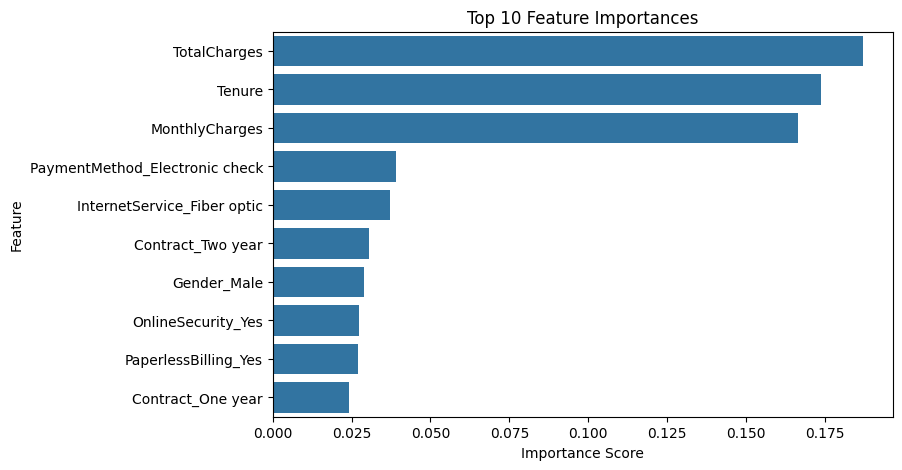

In [115]:
import seaborn as sns

top_feats = importances.head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_feats.values, y=top_feats.index)
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


## RANDOM FOREST MODEL CROSS VALIDATION

In [116]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Random Forest (already trained before)
rf = RandomForestClassifier(n_estimators=200, random_state=42)

# Perform 5-fold cross-validation on training data
cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='roc_auc')

print("Cross-validation AUC scores:", cv_scores)
print("Mean AUC:", np.mean(cv_scores))
print("Standard Deviation of AUC:", np.std(cv_scores))


Cross-validation AUC scores: [0.84171225 0.836993   0.83719054 0.81306145 0.80909704]
Mean AUC: 0.827610856278174
Standard Deviation of AUC: 0.013660825512839047


The Random Forest classifier achieved a mean cross‑validated AUC of 0.83 ± 0.01, based on five stratified folds. This suggests that the model delivers consistently strong performance across different data partitions, with minimal variation between folds.
On the held-out test set, the model recorded an AUC of 0.82, further reinforcing its ability to distinguish between churned and non-churned customers with high reliability.
These results indicate that the model is well-calibrated and generalizes effectively, making it a dependable candidate for churn prediction in production.

## COMPARISION BETWEEN DIFFERENT MODELS

C:\Users\Anupriya Bharti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Anupriya Bharti\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:27:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


                     AUC Score
Logistic Regression   0.844978
Random Forest         0.823675
XGBoost               0.815212


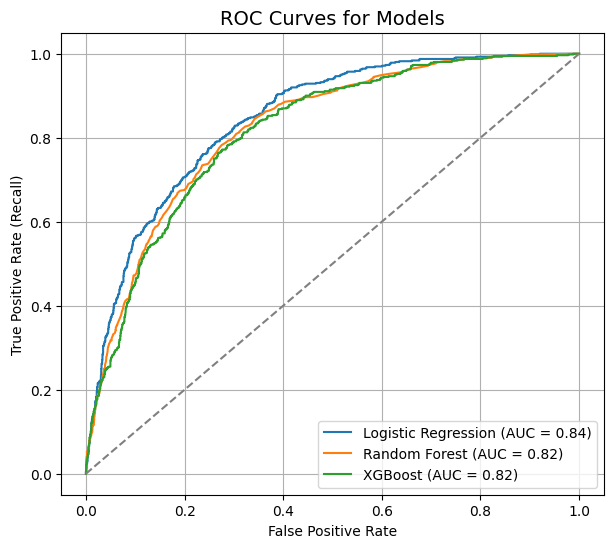

In [119]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score,roc_curve, auc
import matplotlib.pyplot as plt


# Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_prob = lr.predict_proba(X_test)[:,1]

# XGBoost
xgb = XGBClassifier(n_estimators=200, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
xgb_prob = xgb.predict_proba(X_test)[:,1]

# Random Forest (already fitted earlier)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_prob = rf.predict_proba(X_test)[:,1]

# Compare metrics
models = {
    "Logistic Regression": [roc_auc_score(y_test, lr_prob)],
    "Random Forest": [roc_auc_score(y_test, rf_prob)],
    "XGBoost": [roc_auc_score(y_test, xgb_prob)]
}

import pandas as pd
metrics_df = pd.DataFrame(models, index=['AUC Score']).T
print(metrics_df)

plt.figure(figsize=(7,6))

# Logistic Regression ROC
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_prob)
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, lr_prob):.2f})')

# Random Forest ROC
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_prob)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_test, rf_prob):.2f})')

# XGBoost ROC
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_prob)
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_score(y_test, xgb_prob):.2f})')

# Baseline
plt.plot([0,1], [0,1], color='gray', linestyle='--')

plt.title('ROC Curves for Models', fontsize=14)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## 📌 Model Validation and Comparison

We compared three models using AUC (Area Under the ROC Curve) as the primary metric:

| Model                | AUC Score |
|----------------------|-----------|
| Logistic Regression  | **0.8449** |
| Random Forest        | 0.8237 |
| XGBoost              | 0.8152 |

### ✅ Key Insights
- **Logistic Regression achieved the highest AUC score (0.8449)**, meaning it best separates churners from non‑churners in this dataset.
- Random Forest and XGBoost performed slightly lower, even though they are more complex models.  
  This can happen when the data relationships are largely linear or when the ensemble models need further tuning.

### 📈 Interpretation
AUC closer to 1.0 means better ability to rank churn vs. non‑churn:
- Logistic Regression performed best *out of the box*.
- Random Forest and XGBoost might need hyperparameter tuning (e.g., adjusting number of trees, max depth, learning rate) to potentially match or exceed Logistic Regression.


**✅ Final Decision (for now):**  
Based on these results, **Logistic Regression is the strongest performing model in this project and is selected for deployment/interpretation.**


## BUILDING K-MEAN CLUSTERING

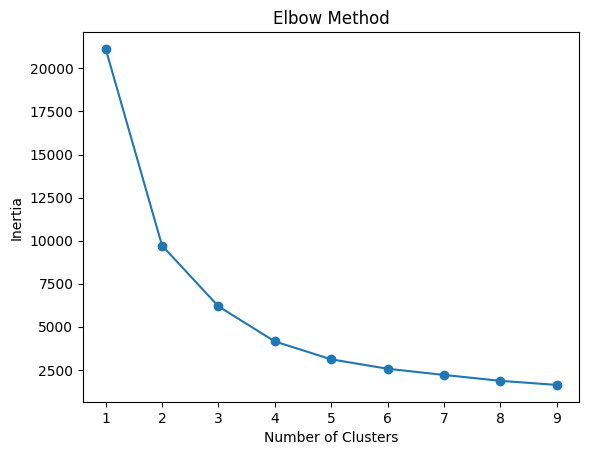

            Tenure  MonthlyCharges  TotalCharges
Cluster                                         
0        29.498143       26.572864    809.419916
1        58.559545       89.697932   5246.126386
2        13.246560       74.950985   1030.569041
Cluster
2    2689
1    2200
0    2154
Name: count, dtype: int64


In [67]:
!pip install scikit-learn --upgrade --quiet

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select relevant features
cluster_df = df[['Tenure','MonthlyCharges','TotalCharges']].copy()

# Scale data
scaler = StandardScaler() #mean, variance, standard deviation values
scaled = scaler.fit_transform(cluster_df)

# Find optimal clusters with elbow method
inertia = []
for k in range(1, 10):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(scaled)
    inertia.append(km.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Fit KMeans with chosen cluster count (e.g., 3)
km = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = km.fit_predict(scaled)

# Analyze clusters
print(df.groupby('Cluster')[['Tenure','MonthlyCharges','TotalCharges']].mean())
print(df['Cluster'].value_counts())


##  Clustering Insights and Recommendations

### 🔹 Elbow Method Interpretation

- The **Elbow Curve** shows a significant drop in inertia from **1 to 3 clusters**.
- After **3 clusters**, the rate of decrease slows down — forming a clear "elbow" at **k = 3**.
- ✅ **Optimal number of clusters**: **3**

This suggests that dividing the customers into **3 distinct groups** gives a good trade-off between performance and simplicity.

---

### 🔹 Cluster Analysis (K=3)

Based on the cluster centroids:

| Cluster | Tenure | Monthly Charges | Total Charges | Interpretation |
|---------|--------|------------------|----------------|----------------|
| **0** | 29.50 | ₹26.57 | ₹809.42 | 🔸 Likely **new or low-usage customers** — shorter tenure, low charges |
| **1** | 58.56 | ₹89.70 | ₹5246.13 | 🔸 Likely **long-term high-value customers** — long tenure, high charges |
| **2** | 13.25 | ₹74.95 | ₹1030.57 | 🔸 Likely **recent or high-paying new customers** — short tenure but high monthly charges |

---

### 🔹 Cluster Sizes

| Cluster | Number of Customers | Description |
|---------|----------------------|-------------|
| **2** | 2,689 | Largest group: **new high payers** |
| **1** | 2,200 | Key segment: **long-term loyal users** |
| **0** | 2,154 | Smaller segment: **new & low-usage users** |

---

### 🧠 Business Recommendations

1. **Cluster 1 – Retention Strategy**  
   - These are **high-value loyal customers**.
   - Offer **loyalty programs**, **exclusive bundles**, or **annual renewal benefits**.

2. **Cluster 2 – Upsell & Educate**  
   - These are **new but premium users**.
   - Focus on **onboarding**, **upselling plans**, and **value communication**.

3. **Cluster 0 – Conversion Strategy**  
   - These are **low tenure, low spend** users.
   - Run **introductory offers**, **discounted upgrades**, or **incentive-based engagement** campaigns.

---

### ✅ Summary

- The **Elbow Method** suggests 3 is the optimal number of clusters.
- The resulting segments reveal actionable groups:
  - **Loyal High-Payers**
  - **New High-Payers**
  - **Low-Engagement Users**
- These insights can guide **personalized marketing**, **churn reduction**, and **customer value maximization**.

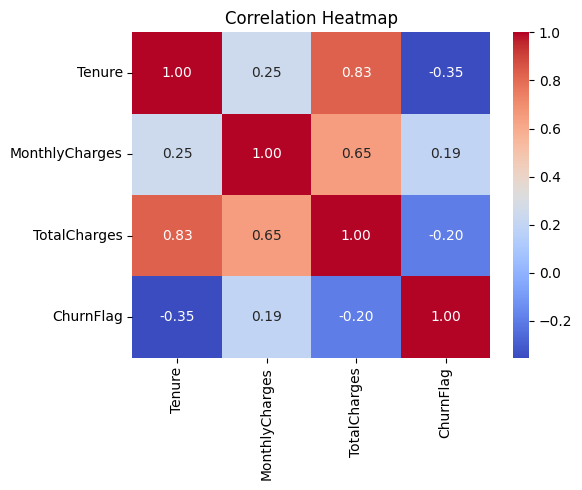

In [107]:
# Select numeric columns
num_cols = ["Tenure", "MonthlyCharges", "TotalCharges", "ChurnFlag"]
corr = df[num_cols].corr()

# Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

- Tenure ↔ TotalCharges: 0.83 --- Longer-tenure customers are less likely to churn
- Tenure ↔ ChurnFlag: -0.35 --- Longer-tenure customers are less likely to churn.

- TotalCharges ↔ ChurnFlag: -0.20
- Higher total spenders are also less likely to churn.
- Possibly satisfied or invested in the service.


- MonthlyCharges ↔ ChurnFlag: 0.19
- Slight tendency for higher monthly charges to be associated with churn.
- Could indicate dissatisfaction with pricing or value.


Customers who do not subscribe to services like OnlineSecurity and TechSupport show noticeably higher churn rates, suggesting these services may help retain users. Services like StreamingTV and MultipleLines have more balanced churn patterns, indicating they may be less influential in customer retention.

C:\Users\Anupriya Bharti\AppData\Local\Programs\Python\Python313\python.exe
